In [430]:
import importlib.util
import numpy as np
from scipy.constants import c
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [431]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

interApi = lumapi.INTERCONNECT(hide = False)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [432]:
um = 1e-6
nm = 1e-9
valor_lambda = 1550*nm
start_wavelenth = 1500*nm
stop_wavelenth = 1600*nm
number_point = 100000
wg_width = 0.45*um
radius = 5*um
ng = 4.325928

file = 'ring_ressonator_PDK'

In [433]:
FSR = [1*nm, 10*nm, 20*nm]

In [434]:
def calcular_Lc (valor_Lr):
    valor_Lc = valor_Lr - 2*np.pi*radius
    return valor_Lc

In [435]:
def calcular_Lr (valor_fsr):
    Valor_Lr = (valor_lambda**2)/(ng*valor_fsr)
    return Valor_Lr

In [436]:
def calcular_fsr (valor_Lr):
    valor_fsr = (valor_lambda**2) / (ng * valor_Lr)
    return valor_fsr

In [437]:
Lc = np.zeros(len(FSR))
num_anel = [1, 1, 1]

In [438]:
Lc_pdk = 15*um
Lr = calcular_Lr(FSR[0])
Lc[0] = calcular_Lc(Lr - 2*Lc_pdk)/2

if Lc[0] < 0:
    print(f'Não é possível contruir ring resonator com um {num_anel[0]} anéis para FSR = {FSR[0]/nm}nm')
    num_anel[0] = num_anel[0] + 1

else:
    print(f'Para FSR = {FSR[0]/nm:.2f}nm:\nComprimento aproximado do anel = {Lr/um:.2f}\u03BCm\nComprimento de acoplamento = {Lc[0]/um:.2f}\u03BCm\nNumero de anéis: {num_anel[0]}\n')

Para FSR = 1.00nm:
Comprimento aproximado do anel = 555.37μm
Comprimento de acoplamento = 246.98μm
Numero de anéis: 1



In [439]:
primeiro = 2
ultimo = primeiro + 9
passo = 10

m1 = np.linspace(primeiro, ultimo, passo)
m2 = m1 - 1

FSR1 = np.zeros(len(m1))
FSR2 = np.zeros(len(m2))

for i in range (len(m1)):
    FSR1[i] = FSR[2]/m1[i]
    FSR2[i] = FSR[2]/m2[i]

In [440]:
Lr1 = np.zeros(len(m1))
Lr2 = np.zeros(len(m2))

for i in range (len(m1)):
    Lr1[i] = calcular_Lr(FSR1[i])
    Lr2[i] = calcular_Lr(FSR2[i])

In [441]:
for i in range (len(m1)):
    Lc1 = calcular_Lc(Lr1[i])/2
    Lc2 = calcular_Lc(Lr2[i])/2

    if Lc1 > 0 and Lc2 > 0:
        print(m1[i], m2[i])
        print(f'{FSR1[i]/nm:.1f}', f'{FSR2[i]/nm:.1f}')
        FSR_total = abs(m2[i] - m1[i]) * (FSR1[i] * FSR2[i]) / abs(FSR1[i] - FSR2[i])
        print(f'{FSR_total/nm:.1f}')
        break

print(f'Para FSR = {FSR[2]/nm:.2f}nm:')
print(f'Comprimento aproximado do anel 1 = {Lr1[i]/um:.2f}\u03BCm\nComprimento aproximado do anel 2 = {Lr2[i]/um:.2f}\u03BCm')
print(f'Comprimento de acoplamento 1 = {Lc1/um:.2f}\u03BCm\nComprimento de acoplamento 2 = {Lc2/um:.2f}\u03BCm')

3.0 2.0
6.7 10.0
20.0
Para FSR = 20.00nm:
Comprimento aproximado do anel 1 = 83.31μm
Comprimento aproximado do anel 2 = 55.54μm
Comprimento de acoplamento 1 = 25.94μm
Comprimento de acoplamento 2 = 12.06μm


In [442]:
x_ona = 0
y_ona = 0

x_acoplador_direcional_sup = 20
y_acoplador_direcional_sup = 200

x_acoplador_direcional_inf = 20
y_acoplador_direcional_inf = 600

distancia = 200

x_waveguide_esquerdo = x_acoplador_direcional_sup - distancia
y_waveguide_esquerdo = y_acoplador_direcional_sup + distancia

x_waveguide_direito = x_acoplador_direcional_sup + distancia
y_waveguide_direito = y_acoplador_direcional_sup + distancia



In [443]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.setposition('ONA', x_ona, y_ona)
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/(start_wavelenth))
interApi.set('stop frequency', c/(stop_wavelenth))
interApi.set('number of points', number_point)

In [444]:
interApi.switchtolayout()

interApi.select(f'Acoplador_Direcional_sup_{num_anel[0]}')
interApi.delete()

interApi.addelement('ebeam_dc_te1550')
interApi.set('name', f'Acoplador_Direcional_sup_{num_anel[0]}')
interApi.setposition(f'Acoplador_Direcional_sup_{num_anel[0]}', x_acoplador_direcional_sup, y_acoplador_direcional_sup)
interApi.set('coupling_length', Lc_pdk)


for i in range(num_anel[0]):
    interApi.select(f'Acoplador_Direcional_inf_{i+1}')
    interApi.delete()
    
    interApi.addelement('ebeam_dc_te1550')
    interApi.set('name', f'Acoplador_Direcional_inf_{i+1}')
    interApi.setposition(f'Acoplador_Direcional_inf_{i+1}', x_acoplador_direcional_inf, y_acoplador_direcional_inf + i*2*distancia)
    interApi.set('coupling_length', Lc_pdk)

In [445]:
for i in range(num_anel[0]):
    if num_anel[0] > 1:
        interApi.select(f'WGD_esquerdo_{i+1}')
        interApi.delete()
        interApi.select(f'WGD_direito_{i+1}')
        interApi.delete()

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_esquerdo_{i+1}')
        interApi.setposition(f'WGD_esquerdo_{i+1}', x_waveguide_esquerdo, y_waveguide_esquerdo + i*2*distancia)
        interApi.set('wg_length', eval(f"Lc{i+1}"))
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_direito_{i+1}')
        interApi.setposition(f'WGD_direito_{i+1}', x_waveguide_direito, y_waveguide_direito + i*2*distancia)
        interApi.set('wg_length', eval(f"Lc{i+1}"))
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

    else:
        interApi.select(f'WGD_esquerdo_{i+1}')
        interApi.delete()
        interApi.select(f'WGD_direito_{i+1}')
        interApi.delete()

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_esquerdo_{i+1}')
        interApi.setposition(f'WGD_esquerdo_{i+1}', x_waveguide_esquerdo, y_waveguide_esquerdo + i*2*distancia)
        interApi.set('wg_length', Lc[0])
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_direito_{i+1}')
        interApi.setposition(f'WGD_direito_{i+1}', x_waveguide_direito, y_waveguide_direito + i*2*distancia)
        interApi.set('wg_length', Lc[0])
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

In [446]:
interApi.connect('ONA', 'output', f'Acoplador_Direcional_sup_1', 'opt_1')

for i in range(num_anel[0]):
    if i == 0:
        interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
        interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
        interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
        interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')

    elif num_anel[0] > 1:
        interApi.connect(f'Acoplador_Direcional_inf_{i}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
        interApi.connect(f'Acoplador_Direcional_inf_{i}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
        interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
        interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')

    else:
        interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
        interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
        interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
        interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')
        break

if num_anel[0] % 2 == 0:
    interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
    interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_4', 'ONA', 'input 2')

else:
    interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
    interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_2', 'ONA', 'input 2')



In [447]:
interApi.save(file)

In [448]:
interApi.run(1)

In [449]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1["'TE' gain (dB)"])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2["'TE' gain (dB)"])  

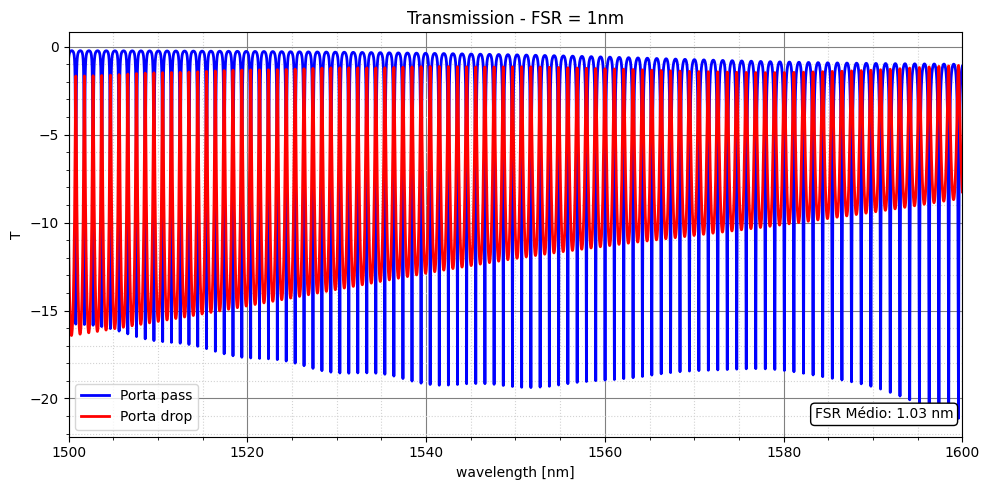

In [450]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta pass', linewidth=2, color='blue')
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta drop', linewidth=2, color='red')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Transmission - FSR = 1nm')
plt.legend(loc='best')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

wavelength = wavelength_1/nm
transmission = transmission_1

vales, _ = find_peaks(-transmission)

vales_wavelengths = wavelength[vales]

distancias_entre_vales = -np.diff(vales_wavelengths)

fsr_medio = np.mean(distancias_entre_vales)

plt.annotate(f'FSR Médio: {fsr_medio:.2f} nm',
             xy=(wavelength.max()-1, transmission.min()),
             fontsize=10, color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
             ha='right')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 1nm.png')
plt.show()

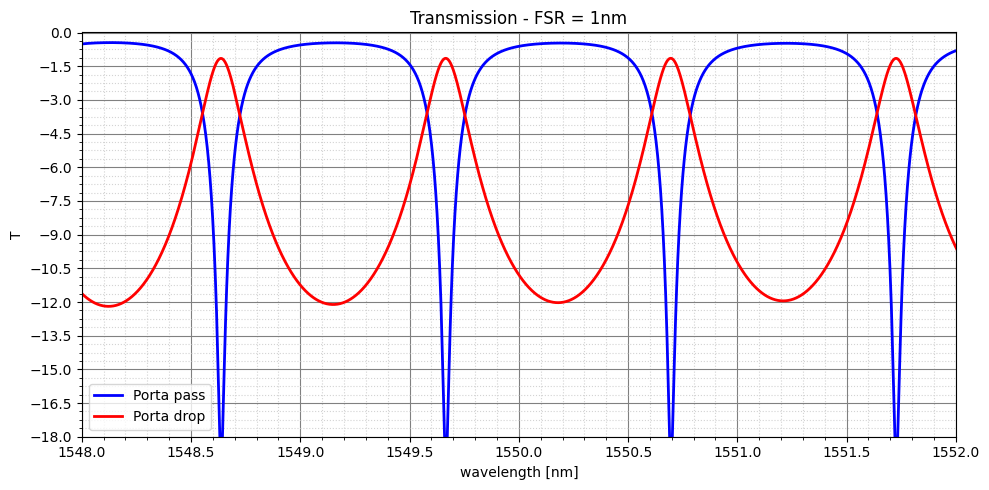

In [451]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta pass', linewidth=2, color='blue')
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta drop', linewidth=2, color='red')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([1548, 1552])
plt.ylim([-18, 0.01])
plt.title(r'Transmission - FSR = 1nm')
plt.legend(loc='best')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')
plt.yticks(np.arange(-18, 0.01, 1.5))

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 1nm.png')
plt.show()

In [452]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_1 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_1 = np.array(FSR_1["'TE' free spectral range (m)"])

wavelength_2_1 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_1 = np.array(FSR_2["'TE' free spectral range (m)"])

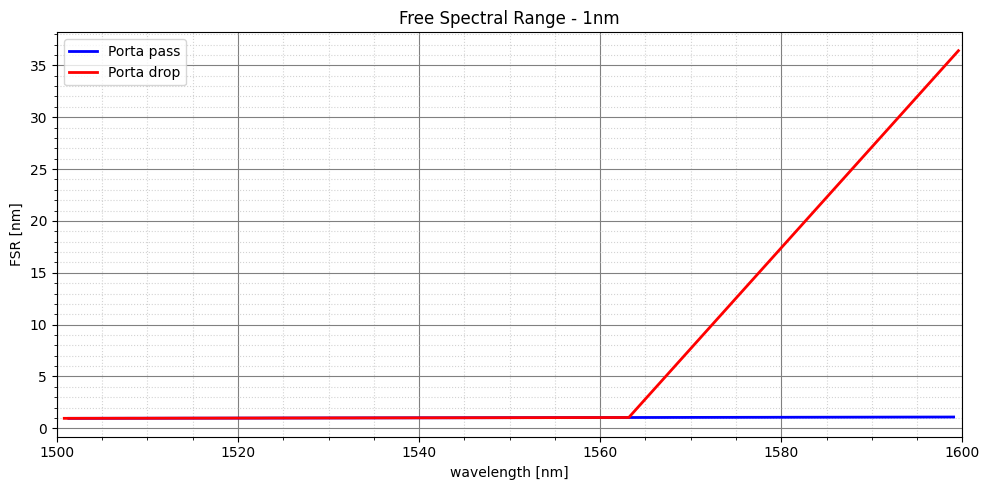

In [453]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta pass', linewidth=2, color='blue')
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta drop', linewidth=2, color='red')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, (stop_wavelenth)/nm])
plt.title(r'Free Spectral Range - 1nm')
plt.legend(loc='best')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 1nm.png')
plt.show()

In [454]:
Lc_pdk = 14*um
Lr = calcular_Lr(FSR[1])
Lc[1] = calcular_Lc(Lr - 2*Lc_pdk)/2

if Lc[0] < 0:
    print(f'Não é possível contruir ring resonator com um {num_anel[1]} anéis para FSR = {FSR[1]/nm}nm')
    num_anel[1] = num_anel[1] + 1

else:
    print(f'Para FSR = {FSR[1]/nm:.2f}nm:\nComprimento aproximado do anel = {Lr/um:.2f}\u03BCm\nComprimento de acoplamento = {Lc[1]/um:.2f}\u03BCm\nNumero de anéis: {num_anel[1]}\n')

Para FSR = 10.00nm:
Comprimento aproximado do anel = 55.54μm
Comprimento de acoplamento = -1.94μm
Numero de anéis: 1



In [455]:
interApi.switchtolayout()

interApi.select(f'Acoplador_Direcional_sup_{num_anel[0]}')
interApi.delete()

interApi.addelement('ebeam_dc_te1550')
interApi.set('name', f'Acoplador_Direcional_sup_{num_anel[0]}')
interApi.setposition(f'Acoplador_Direcional_sup_{num_anel[0]}', x_acoplador_direcional_sup, y_acoplador_direcional_sup)
interApi.set('coupling_length', Lc_pdk)


for i in range(num_anel[1]):
    interApi.select(f'Acoplador_Direcional_inf_{i+1}')
    interApi.delete()
    
    interApi.addelement('ebeam_dc_te1550')
    interApi.set('name', f'Acoplador_Direcional_inf_{i+1}')
    interApi.setposition(f'Acoplador_Direcional_inf_{i+1}', x_acoplador_direcional_inf, y_acoplador_direcional_inf + i*2*distancia)
    interApi.set('coupling_length', Lc_pdk)

In [456]:
for i in range(num_anel[1]):
    if num_anel[1] > 1:
        interApi.select(f'WGD_esquerdo_{i+1}')
        interApi.delete()
        interApi.select(f'WGD_direito_{i+1}')
        interApi.delete()

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_esquerdo_{i+1}')
        interApi.setposition(f'WGD_esquerdo_{i+1}', x_waveguide_esquerdo, y_waveguide_esquerdo + i*2*distancia)
        interApi.set('wg_length', eval(f"Lc{i+1}"))
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_direito_{i+1}')
        interApi.setposition(f'WGD_direito_{i+1}', x_waveguide_direito, y_waveguide_direito + i*2*distancia)
        interApi.set('wg_length', eval(f"Lc{i+1}"))
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

    else:
        interApi.select(f'WGD_esquerdo_{i+1}')
        interApi.delete()
        interApi.select(f'WGD_direito_{i+1}')
        interApi.delete()

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_esquerdo_{i+1}')
        interApi.setposition(f'WGD_esquerdo_{i+1}', x_waveguide_esquerdo, y_waveguide_esquerdo + i*2*distancia)
        interApi.set('wg_length', Lc[1])
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_direito_{i+1}')
        interApi.setposition(f'WGD_direito_{i+1}', x_waveguide_direito, y_waveguide_direito + i*2*distancia)
        interApi.set('wg_length', Lc[1])
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

if Lc[1] <= 0.01:
    interApi.select(f'WGD_esquerdo_{i+1}')
    interApi.delete()
    interApi.select(f'WGD_direito_{i+1}')
    interApi.delete()

In [457]:
interApi.connect('ONA', 'output', f'Acoplador_Direcional_sup_1', 'opt_1')

if Lc[1] > 0.01:
    for i in range(num_anel[1]):
        if i == 0:
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
            interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
            interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')

        elif num_anel[1] > 1:
            interApi.connect(f'Acoplador_Direcional_inf_{i}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
            interApi.connect(f'Acoplador_Direcional_inf_{i}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
            interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
            interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')

        else:
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
            interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
            interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')
            break

    if num_anel[1] % 2 == 0:
        interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
        interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_4', 'ONA', 'input 2')

    else:
        interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
        interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_2', 'ONA', 'input 2')

else:
    interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
    interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')
    interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
    interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_2', 'ONA', 'input 2')


In [458]:
interApi.save(file)

In [459]:
interApi.run(1)

In [460]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1["'TE' gain (dB)"])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2["'TE' gain (dB)"])

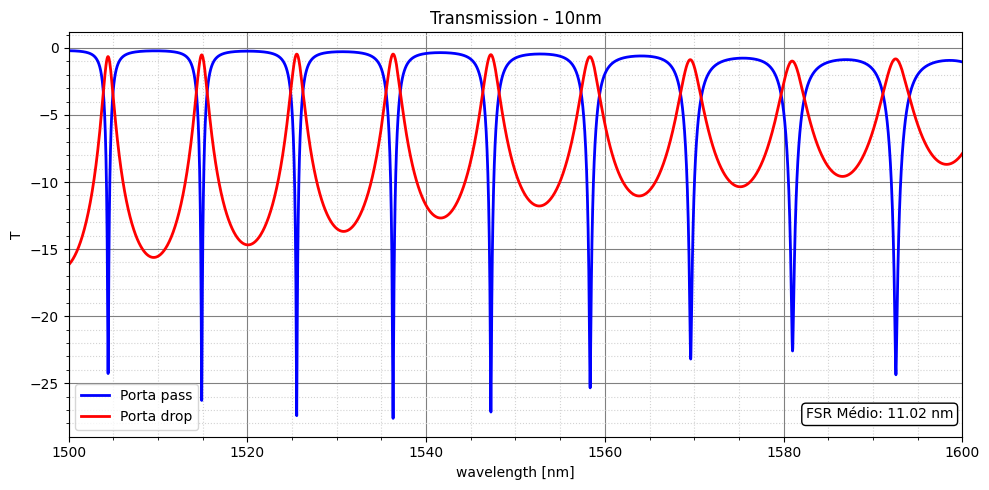

In [461]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta pass', linewidth=2, color='blue')
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta drop', linewidth=2, color='red')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Transmission - 10nm')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

wavelength = wavelength_1/nm
transmission = transmission_1

vales, _ = find_peaks(-transmission)

vales_wavelengths = wavelength[vales]

distancias_entre_vales = -np.diff(vales_wavelengths)

fsr_medio = np.mean(distancias_entre_vales)

plt.annotate(f'FSR Médio: {fsr_medio:.2f} nm',
             xy=(wavelength.max()-1, transmission.min()),
             fontsize=10, color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
             ha='right')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 10nm.png')
plt.show()

In [462]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_10 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_10 = np.array(FSR_1["'TE' free spectral range (m)"])

wavelength_2_10 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_10 = np.array(FSR_2["'TE' free spectral range (m)"])   

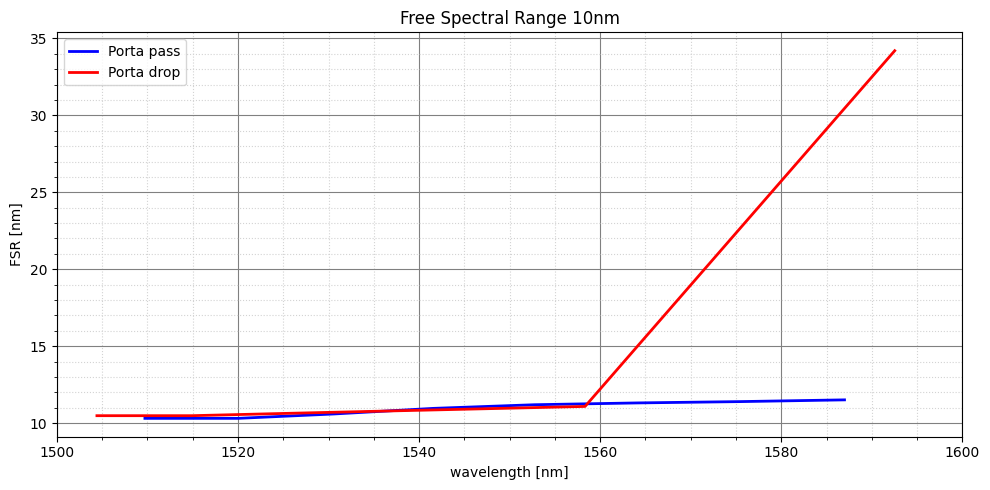

In [463]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta pass', linewidth=2, color='blue')
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta drop', linewidth=2, color='red')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range 10nm')
plt.legend(loc='best')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 10nm.png')
plt.show()

In [464]:
Lc_pdk = 5*um
Lr = calcular_Lr(FSR[2])
Lc[2] = calcular_Lc(Lr - 2*Lc_pdk)/2

if Lc[0] < 0:
    print(f'Não é possível contruir ring resonator com um {num_anel[2]} anéis para FSR = {FSR[2]/nm}nm')
    num_anel[2] = num_anel[2] + 1

else:
    print(f'Para FSR = {FSR[2]/nm:.2f}nm:\nComprimento aproximado do anel = {Lr/um:.2f}\u03BCm\nComprimento de acoplamento = {Lc[2]/um:.2f}\u03BCm\nNumero de anéis: {num_anel[2]}\n')

Para FSR = 20.00nm:
Comprimento aproximado do anel = 27.77μm
Comprimento de acoplamento = -6.82μm
Numero de anéis: 1



In [465]:
interApi.switchtolayout()

interApi.select(f'Acoplador_Direcional_sup_{num_anel[0]}')
interApi.delete()

interApi.addelement('ebeam_dc_te1550')
interApi.set('name', f'Acoplador_Direcional_sup_{num_anel[0]}')
interApi.setposition(f'Acoplador_Direcional_sup_{num_anel[0]}', x_acoplador_direcional_sup, y_acoplador_direcional_sup)
interApi.set('coupling_length', Lc_pdk)


for i in range(num_anel[2]):
    interApi.select(f'Acoplador_Direcional_inf_{i+1}')
    interApi.delete()
    
    interApi.addelement('ebeam_dc_te1550')
    interApi.set('name', f'Acoplador_Direcional_inf_{i+1}')
    interApi.setposition(f'Acoplador_Direcional_inf_{i+1}', x_acoplador_direcional_inf, y_acoplador_direcional_inf + i*2*distancia)
    interApi.set('coupling_length', Lc_pdk)

In [466]:
for i in range(num_anel[1]):
    if num_anel[1] > 1:
        interApi.select(f'WGD_esquerdo_{i+1}')
        interApi.delete()
        interApi.select(f'WGD_direito_{i+1}')
        interApi.delete()

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_esquerdo_{i+1}')
        interApi.setposition(f'WGD_esquerdo_{i+1}', x_waveguide_esquerdo, y_waveguide_esquerdo + i*2*distancia)
        interApi.set('wg_length', eval(f"Lc{i+1}"))
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_direito_{i+1}')
        interApi.setposition(f'WGD_direito_{i+1}', x_waveguide_direito, y_waveguide_direito + i*2*distancia)
        interApi.set('wg_length', eval(f"Lc{i+1}"))
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

    else:
        interApi.select(f'WGD_esquerdo_{i+1}')
        interApi.delete()
        interApi.select(f'WGD_direito_{i+1}')
        interApi.delete()

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_esquerdo_{i+1}')
        interApi.setposition(f'WGD_esquerdo_{i+1}', x_waveguide_esquerdo, y_waveguide_esquerdo + i*2*distancia)
        interApi.set('wg_length', Lc[1])
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

        interApi.addelement('ebeam_wg_integral_1550')
        interApi.set('name', f'WGD_direito_{i+1}')
        interApi.setposition(f'WGD_direito_{i+1}', x_waveguide_direito, y_waveguide_direito + i*2*distancia)
        interApi.set('wg_length', Lc[1])
        interApi.set('wg_width', wg_width)
        interApi.set('Rotated', 45)

if Lc[1] <= 0.01:
    interApi.select(f'WGD_esquerdo_{i+1}')
    interApi.delete()
    interApi.select(f'WGD_direito_{i+1}')
    interApi.delete()

In [467]:
interApi.connect('ONA', 'output', f'Acoplador_Direcional_sup_1', 'opt_1')

if Lc[2] > 0.01:
    for i in range(num_anel[1]):
        if i == 0:
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
            interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
            interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')

        elif num_anel[2] > 1:
            interApi.connect(f'Acoplador_Direcional_inf_{i}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
            interApi.connect(f'Acoplador_Direcional_inf_{i}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
            interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
            interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')

        else:
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'WGD_esquerdo_{i+1}', 'port 1')
            interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'WGD_direito_{i+1}', 'port 1')
            interApi.connect(f'WGD_esquerdo_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
            interApi.connect(f'WGD_direito_{i+1}', 'port 2', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')
            break

    if num_anel[2] % 2 == 0:
        interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
        interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_4', 'ONA', 'input 2')

    else:
        interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
        interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_2', 'ONA', 'input 2')

else:
    interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_2', f'Acoplador_Direcional_inf_{i+1}', 'opt_1')
    interApi.connect(f'Acoplador_Direcional_sup_{i+1}', 'opt_4', f'Acoplador_Direcional_inf_{i+1}', 'opt_3')
    interApi.connect(f'Acoplador_Direcional_sup_1', 'opt_3', 'ONA', 'input 1')
    interApi.connect(f'Acoplador_Direcional_inf_{i+1}', 'opt_2', 'ONA', 'input 2')


In [468]:
interApi.save(file)

In [469]:
interApi.run(1)

In [470]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1["'TE' gain (dB)"])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2["'TE' gain (dB)"])  

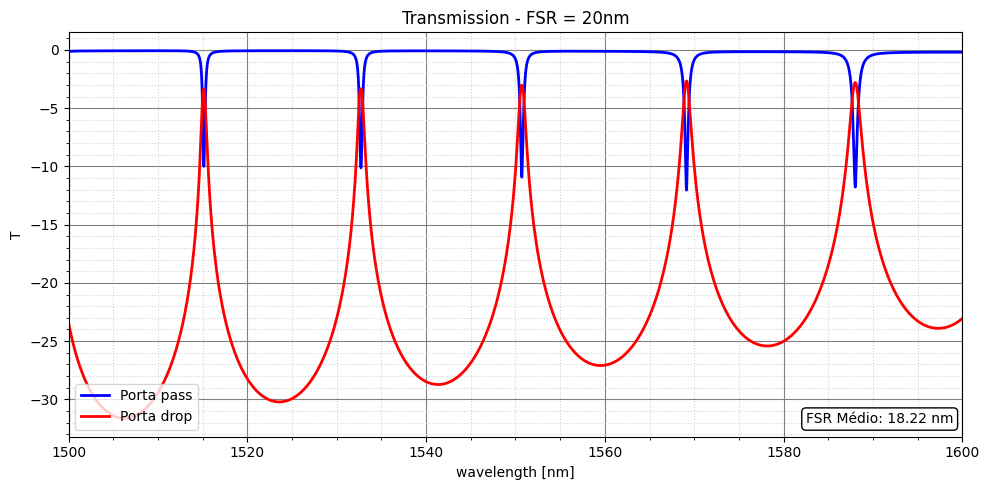

In [482]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta pass', linewidth=2, color='blue')
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta drop', linewidth=2, color='red')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Transmission - FSR = 20nm')
plt.legend(loc='lower left')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

wavelength = wavelength_1/nm
transmission = transmission_1

vales, _ = find_peaks(-transmission)

vales_wavelengths = wavelength[vales]

distancias_entre_vales = -np.diff(vales_wavelengths)

fsr_medio = np.mean(distancias_entre_vales)

plt.annotate(f'FSR Médio: {fsr_medio:.2f} nm',
             xy=(wavelength.max()-1, transmission.min()-20),
             fontsize=10, color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'),
             ha='right')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 20nm.png')
plt.show()

In [483]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_20 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_20 = np.array(FSR_1["'TE' free spectral range (m)"])

wavelength_2_20 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_20 = np.array(FSR_2["'TE' free spectral range (m)"])  

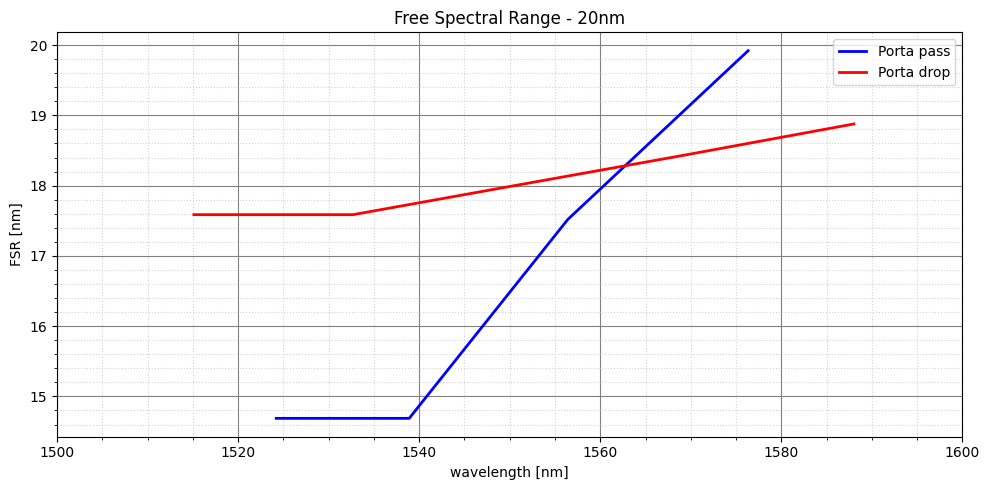

In [484]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1_20/nm, fsrplot_1_20/nm, label = 'Porta pass', linewidth=2, color='blue')
plt.plot(wavelength_2_20/nm, fsrplot_2_20/nm, label = 'Porta drop', linewidth=2, color='red')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range - 20nm')
plt.legend(loc='best')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 20nm.png')
plt.show()

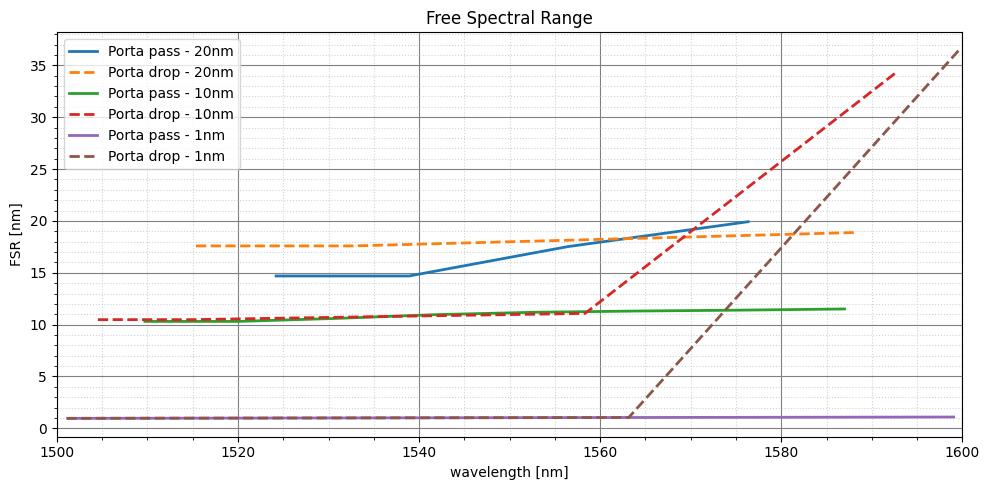

In [485]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)

plt.plot(wavelength_1_20/nm, fsrplot_1_20/nm, label = 'Porta pass - 20nm', linewidth=2)
plt.plot(wavelength_2_20/nm, fsrplot_2_20/nm, label = 'Porta drop - 20nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta pass - 10nm', linewidth=2)
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta drop - 10nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta pass - 1nm', linewidth=2)
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta drop - 1nm', linewidth=2, linestyle='--')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range')
plt.legend(loc='best')
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR.png')
plt.show()